<a href="https://colab.research.google.com/github/laynotena/Data-Mining/blob/main/HW4/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
import matplotlib.pyplot as plt

In [2]:
def data_generate(data):
    label = []
    text = []
    for i in range(len(data)):
        label.append(data.emoticon[i][0])
        text.append(data.emoticon[i][9:])
    df = pd.DataFrame(data = label, columns=['label'])
    df['text'] = text
    return df

In [25]:
def plot(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [18]:
class RNN():
    def __init__(self, input_length=380, input_dim=3800, output_dim=32):
        self.rnn = Sequential()
        self.rnn.add(Embedding(input_length = input_length, input_dim = input_dim, output_dim = output_dim ))
        self.rnn.add(Dropout(0.7))
    def build_in(self):
        self.rnn.add(SimpleRNN(units=16))
        self.rnn.add(Dense(units=256,activation='relu'))
        self.rnn.add(Dropout(0.7))
        self.rnn.add(Dense(units=1,activation='sigmoid'))
    def evaluation(self,X_train, Y_train, X_test, Y_test):
        self.rnn.summary()
        self.rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        self.train_history = self.rnn.fit(X_train,Y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.2)
        self.scores = self.rnn.evaluate(X_test, Y_test, verbose=1)
        print('the acc for RNN is : ', self.scores[1])

###1. 資料前處理

In [3]:
training = pd.read_csv('training_label.txt', delimiter = "\t",names = ['emoticon'])
testing = pd.read_csv('testing_label.txt',delimiter = "\t", names = ['emoticon'])

#### 1-a. 建立 train, test 之 DataFrame

In [4]:
train = data_generate(training)
test = data_generate(testing)

In [10]:
Y_train = train['label'].astype(int)
Y_test = test['label'].astype(int)

#### 1-b. 建立 Token

In [6]:
#建立字典
token = Tokenizer(num_words = 3800)
#訓練字典
token.fit_on_texts(train.text)
#轉換文本
X_train_seq = token.texts_to_sequences(train.text)
X_test_seq = token.texts_to_sequences(test.text)

#### 1-c. Padding

In [7]:
X_train = sequence.pad_sequences(X_train_seq, maxlen=380)
X_test = sequence.pad_sequences(X_test_seq, maxlen=380)

### 2. RNN

In [11]:
model_RNN = RNN()
model_RNN.build_in()
model_RNN.evaluation(X_train, Y_train, X_test, Y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
________________________________________________

In [27]:
model_RNN.train_history.history

{'accuracy': [0.7274937629699707,
  0.7736062407493591,
  0.7702312469482422,
  0.7756249904632568,
  0.7826562523841858,
  0.783287525177002,
  0.7853749990463257,
  0.7840499877929688,
  0.7876187562942505,
  0.7877062559127808],
 'loss': [0.5370564460754395,
  0.48354896903038025,
  0.4874587059020996,
  0.4811769127845764,
  0.4723024070262909,
  0.4698943495750427,
  0.4650973975658417,
  0.4629032611846924,
  0.4581882953643799,
  0.4557715952396393],
 'val_accuracy': [0.7803249955177307,
  0.7835749983787537,
  0.7854750156402588,
  0.7841749787330627,
  0.7813249826431274,
  0.784974992275238,
  0.786050021648407,
  0.7862750291824341,
  0.7861250042915344,
  0.7887250185012817],
 'val_loss': [0.4721515476703644,
  0.4659183621406555,
  0.4683130383491516,
  0.46612411737442017,
  0.4694828987121582,
  0.4663850963115692,
  0.4613434970378876,
  0.4584132432937622,
  0.4571187496185303,
  0.4547019600868225]}

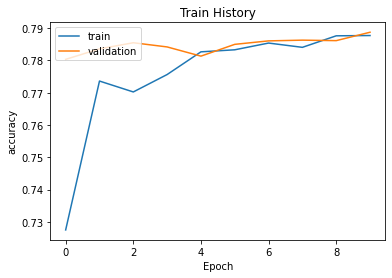

In [28]:
plot(model_RNN.train_history,'accuracy','val_accuracy')

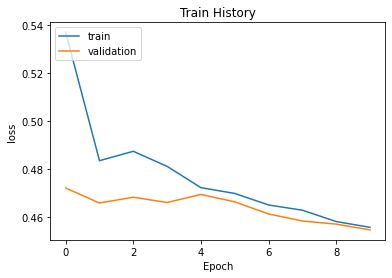

In [30]:
plot(model_RNN.train_history,'loss','val_loss')